## Kaggle Advance House Price Prediction Using Pytorch- Tabular Dataset

In [19]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [7]:
df.shape

(1201, 10)

In [8]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


### Let's Do Some Feature Engineering

In [9]:
import datetime
datetime.datetime.now().year

2025

In [10]:
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [11]:
df.drop("YearBuilt",axis=1,inplace=True)

In [12]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,25


In [13]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_feature="SalePrice"

### Let's Encode Categorcial Features

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [17]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,22
1,0,3,80.0,9600,1,3,1262,0,181500,49
2,5,3,68.0,11250,1,0,920,866,223500,24
3,6,3,60.0,9550,1,0,961,756,140000,110
4,5,3,84.0,14260,1,0,1145,1053,250000,25
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,26
1456,0,3,85.0,13175,1,3,2073,0,210000,47
1457,6,3,66.0,9042,1,3,1188,1152,266500,84
1458,0,3,68.0,9717,1,3,1078,0,142125,75


In [20]:
### Stacking and Converting Into Tensors
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features
              

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [22]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [23]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [24]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [25]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [26]:
cont_values.dtype

torch.float32

In [29]:
### Predicted Value

y=torch.tensor(df["SalePrice"].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [31]:
#### Embedding Size For Categorical columns
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]
cat_dims

[15, 5, 2, 4]

In [32]:
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [34]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [36]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))
embedding_val

[tensor([[ 0.0308,  1.7149,  1.0526,  ..., -0.7306, -0.3975,  0.6934],
         [ 0.5915,  0.6019, -0.0573,  ..., -0.5333, -1.1477,  0.8509],
         [ 0.0308,  1.7149,  1.0526,  ..., -0.7306, -0.3975,  0.6934],
         ...,
         [-0.9622, -0.2708, -1.1555,  ..., -0.2609,  1.1149, -0.7737],
         [ 0.5915,  0.6019, -0.0573,  ..., -0.5333, -1.1477,  0.8509],
         [ 0.5915,  0.6019, -0.0573,  ..., -0.5333, -1.1477,  0.8509]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.2903,  0.4433, -1.3400],
         [ 0.2903,  0.4433, -1.3400],
         [ 0.2903,  0.4433, -1.3400],
         ...,
         [ 0.2903,  0.4433, -1.3400],
         [ 0.2903,  0.4433, -1.3400],
         [ 0.2903,  0.4433, -1.3400]], grad_fn=<EmbeddingBackward0>),
 tensor([[-1.6235],
         [-1.6235],
         [-1.6235],
         ...,
         [-1.6235],
         [-1.6235],
         [-1.6235]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.2251, -0.4763],
         [ 0.2251, -0.4763],
         [ 0.0416,  0.

In [37]:
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.0308,  1.7149,  1.0526,  ..., -1.6235,  0.2251, -0.4763],
        [ 0.5915,  0.6019, -0.0573,  ..., -1.6235,  0.2251, -0.4763],
        [ 0.0308,  1.7149,  1.0526,  ..., -1.6235,  0.0416,  0.0062],
        ...,
        [-0.9622, -0.2708, -1.1555,  ..., -1.6235,  0.2251, -0.4763],
        [ 0.5915,  0.6019, -0.0573,  ..., -1.6235,  0.2251, -0.4763],
        [ 0.5915,  0.6019, -0.0573,  ..., -1.6235,  0.2251, -0.4763]],
       grad_fn=<CatBackward0>)

In [38]:
#### Implement dropupout
droput=nn.Dropout(.4)

In [39]:
final_embed=droput(z)
final_embed

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0000,  0.0000, -0.7939],
        [ 0.9858,  1.0032, -0.0956,  ..., -0.0000,  0.3751, -0.0000],
        [ 0.0000,  2.8581,  1.7543,  ..., -2.7058,  0.0000,  0.0104],
        ...,
        [-1.6037, -0.4513, -1.9258,  ..., -2.7058,  0.3751, -0.7939],
        [ 0.9858,  1.0032, -0.0956,  ..., -0.0000,  0.0000, -0.0000],
        [ 0.0000,  1.0032, -0.0956,  ..., -2.7058,  0.0000, -0.7939]],
       grad_fn=<MulBackward0>)

In [41]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [43]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### Define Loss And Optimizer

In [53]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)
loss_function=nn.MSELoss()

In [45]:
df.shape

(1201, 10)

In [46]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [47]:
cont_values.shape

torch.Size([1201, 5])

### Split Data Into Training Data and Test Data

In [48]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [49]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [54]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 200496.75
Epoch number: 11 and the loss : 200493.53125
Epoch number: 21 and the loss : 200489.171875
Epoch number: 31 and the loss : 200482.6875
Epoch number: 41 and the loss : 200473.671875
Epoch number: 51 and the loss : 200461.546875
Epoch number: 61 and the loss : 200446.96875
Epoch number: 71 and the loss : 200428.796875
Epoch number: 81 and the loss : 200407.578125
Epoch number: 91 and the loss : 200383.5625
Epoch number: 101 and the loss : 200356.359375
Epoch number: 111 and the loss : 200322.578125
Epoch number: 121 and the loss : 200290.8125
Epoch number: 131 and the loss : 200250.59375
Epoch number: 141 and the loss : 200211.859375
Epoch number: 151 and the loss : 200158.59375
Epoch number: 161 and the loss : 200113.125
Epoch number: 171 and the loss : 200054.5625
Epoch number: 181 and the loss : 200006.0625
Epoch number: 191 and the loss : 199946.890625
Epoch number: 201 and the loss : 199877.359375
Epoch number: 211 and the loss : 199813.04687

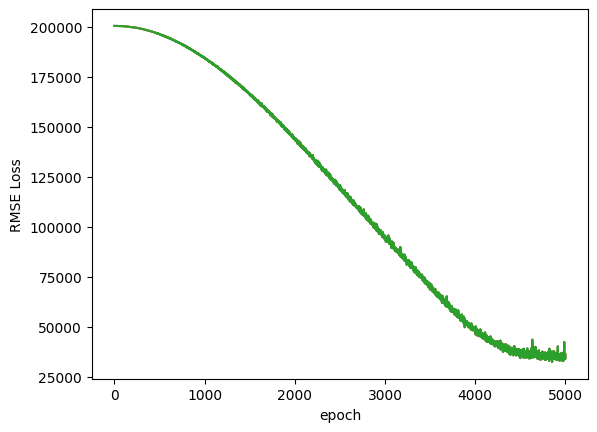

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), [list.detach().numpy() for list in (final_losses)])
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')
plt.show()

In [65]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 48899.0859375


In [66]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [67]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])
data_predicted

,Prediction
0,105323.195312
1,191323.109375
2,141081.812500
3,238544.187500
4,208010.406250
5,158452.218750
6,268214.625000
7,280481.750000
8,153439.187500
9,342578.781250


In [68]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,105323.195312,24676.804688
1,138887.0,191323.109375,-52436.109375
2,175500.0,141081.812500,34418.187500
3,195000.0,238544.187500,-43544.187500
4,142500.0,208010.406250,-65510.406250


In [69]:
#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

In [70]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [71]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [72]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [73]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)